In [1]:
import numpy as np 
import pandas as pd 
from tqdm.auto import tqdm
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Riccardo+-+TDC+-+FinalVersion+2_31+marzo+2023_06.01.xlsx", header=0)

df.rename(columns=lambda x: x.strip())

df.head()

/home/cri98li/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,DC_SCS7,DC_SCS8,DC_SCS9,DC_SCS10,Finalthoughts,diff,Group,Order,FL_10_DO,FL_323_DO
0,Data di inizio,Data di fine,Tipo risposta,Indirizzo IP,Avanzamento,Durata (in secondi),Terminato,Data registrata,ID di risposta,Cognome del destinatario,...,I did not find inconsistencies in this cluster...,I think that most people would learn to unders...,I did not need more references in the clusteri...,I received the clustering method in a timely ...,Do you have any suggestion or feedback?,Have you found any difficulty?,Group,Order,FL_10 - Block Randomizer - Display Order,FL_323 - Block Randomizer - Display Order
1,2023-03-22 10:39:59,2023-03-22 10:53:21,Indirizzo IP,213.215.189.91,100,801,Vero,2023-03-22 10:53:23.289000,R_2Ym2QkI33saQir8,NaN,...,Disagree,Disagree,Agree,Neutral,"In the first 'brach' of questions, the third o...",NaN,Group3,ComplexFirst,FL_19,FL_325
2,2023-03-22 11:15:24,2023-03-22 11:16:05,Indirizzo IP,5.169.201.0,100,41,Vero,2023-03-22 11:16:07.457000,R_10Pl3aoWFPiFdCf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-22 11:16:37,2023-03-22 11:17:00,Indesiderato,5.169.201.0,100,22,Vero,2023-03-22 11:17:00.961000,R_z8r6wdddfzHvabn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-22 11:26:25,2023-03-22 11:26:43,Indirizzo IP,2.229.186.30,100,17,Vero,2023-03-22 11:26:43.574000,R_3ERNcyxeiHEFg9m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dizionario = dict(zip(df.columns, df.values[0, :]))
df = df.drop(0)
len(dizionario)

185

In [4]:
len(df)

38

In [5]:
df.isna().sum()

StartDate     0
EndDate       0
Status        0
IPAddress     0
Progress      0
             ..
diff         34
Group         8
Order         8
FL_10_DO      8
FL_323_DO     8
Length: 185, dtype: int64

In [6]:
cluster_columns = ["Tree_Easy_Cluster", "Clu_Easy_Cluster", "Dend_Easy_Cluster",
                  "Tree_Complex_Cluster", "Clu_Complex_Cluster", "Dend_Complex_Cluster"]

difficulty_columns = ["Tree_Easy_Difficulty", "Clu_Easy_Difficulty", "Dend_Easy_Difficulty",
                     "Tree_Complex_Diff", "Clu_Complex_Diff", "Dend_Complex_Diff"]

confidence_columns = ["Tree_Easy_Confidence", "Clu_Easy_Confidence", "Dend_Easy_Confidence",
                     "Tree_Complex_Conf", "Clu_Complex_Conf", "Dend_Complex_Conf",]

SCS = [x for x in df.columns if re.match(".*SCS.*", x)]

education_columns = ["School", "School_5_TEXT", "School_major"]

time = [x for x in df.columns if re.match(".*[Tt]ime.*", x)]

pesi = ["Mental-Temporal", "Mental-Performance", "Mental-Effort", "Mental-Frustration", "Mental-Temporal.1", "Mental-Performance.1", "Mental-Effort.1", "Mental-Frustration.1"]

In [7]:
import re

for name in df.columns:
    if re.match(".*nasa.*", name):
        print(name)

In [8]:
len(df[cluster_columns].sort_values(cluster_columns))

38

In [9]:
for tmp in cluster_columns:
    df = df[~df[tmp].isna()]

In [10]:
for col in cluster_columns:
    df[col] = df[col].apply(lambda x: x.split(" ")[-1] if type(x)==str else x)

In [11]:
df[cluster_columns]

,Tree_Easy_Cluster,Clu_Easy_Cluster,Dend_Easy_Cluster,Tree_Complex_Cluster,Clu_Complex_Cluster,Dend_Complex_Cluster
1,0,0,4,4,8,3
5,2,3,0,4,5,5
8,0,3,4,4,0,3
9,0,3,4,4,3,3
10,0,0,4,4,2,5
11,0,2,2,4,5,2
12,0,3,0,4,6,1
15,0,2,4,4,2,3
16,0,0,4,4,5,6
17,0,2,1,4,3,0


In [12]:
difficulty_levels = ["Very easy", "Easy", "Neutral", "Difficult", "Very difficult"]

for col in difficulty_columns:
    df[col] = df[col].apply(lambda x: difficulty_levels.index(x)+1)

In [13]:
confidence_levels = list(reversed(["Completely confident", "Fairly confident", "Somewhat confident", "Slightly confident", "Not confident at all"]))

for col in confidence_columns:
    df[col] = df[col].apply(lambda x: confidence_levels.index(x)+1)

In [14]:
SCS_values = list(reversed(['Strongly Agree', 'Agree', "Neutral", 'Disagree', 'Strongly disagree']))

for col in SCS:
    df[col] = df[col].apply(lambda x: SCS_values.index(x)+1)

In [15]:
df.Tree_Easy_Cluster = df.Tree_Easy_Cluster.apply(lambda x: int(x) == 0)
df.Clu_Easy_Cluster = df.Clu_Easy_Cluster.apply(lambda x: int(x) == 2)
df.Dend_Easy_Cluster = df.Dend_Easy_Cluster.apply(lambda x: int(x) == 4)

df.Tree_Complex_Cluster = df.Tree_Complex_Cluster.apply(lambda x: int(x) == 4)
df.Clu_Complex_Cluster = df.Clu_Complex_Cluster.apply(lambda x: int(x) == 2)
df.Dend_Complex_Cluster = df.Dend_Complex_Cluster.apply(lambda x: int(x) == 6)


df[cluster_columns]

,Tree_Easy_Cluster,Clu_Easy_Cluster,Dend_Easy_Cluster,Tree_Complex_Cluster,Clu_Complex_Cluster,Dend_Complex_Cluster
1,True,False,True,True,False,False
5,False,False,False,True,False,False
8,True,False,True,True,False,False
9,True,False,True,True,False,False
10,True,False,True,True,True,False
11,True,True,False,True,False,False
12,True,False,False,True,False,False
15,True,True,True,True,True,False
16,True,False,True,True,False,True
17,True,True,False,True,False,False


In [16]:
df_bar = df[cluster_columns].apply(pd.value_counts)

df_bar.T

,False,True
Tree_Easy_Cluster,2,16
Clu_Easy_Cluster,13,5
Dend_Easy_Cluster,9,9
Tree_Complex_Cluster,2,16
Clu_Complex_Cluster,16,2
Dend_Complex_Cluster,16,2


<Axes: >

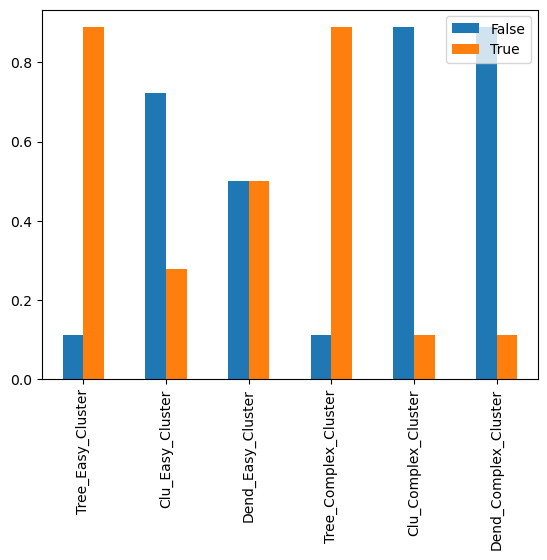

In [17]:
(df_bar.T/len(df)).plot.bar()

# SCS

In [18]:
col_names = ["TE_SCS_TOT", "CE_SCS_TOT", "DE_SCS_TOT", "TC_SCS_TOT", "CC_SCS_TOT", "DC_SCS_TOT"]
col_values = [[0, 0, 0, 0, 0, 0] for _ in range(len(df))]

for t in SCS:
    for i, el in enumerate(df[t].values):
        el = int(el)
        if t[:2] == "TE":
            col_values[i][0] += el
        if t[:2] == "CE":
            col_values[i][1] += el
        if t[:2] == "DE":
            col_values[i][2] += el

        if t[:2] == "TC":
            col_values[i][3] += el
        if t[:2] == "CC":
            col_values[i][4] += el
        if t[:2] == "DC":
            col_values[i][5] += el

In [19]:
df_SCS = pd.DataFrame(col_values, columns=col_names)/50

df_SCS

,TE_SCS_TOT,CE_SCS_TOT,DE_SCS_TOT,TC_SCS_TOT,CC_SCS_TOT,DC_SCS_TOT
0,0.82,0.62,0.56,0.90,0.48,0.56
1,0.46,0.32,0.30,0.64,0.24,0.32
2,0.80,0.42,0.64,0.68,0.38,0.62
3,0.90,0.62,0.68,0.84,0.42,0.84
4,0.74,0.56,0.66,0.72,0.64,0.66
5,0.78,0.78,0.48,0.84,0.58,0.28
6,0.84,0.66,0.68,0.90,0.58,0.64
7,0.70,0.76,0.76,0.76,0.72,0.76
8,0.86,0.52,0.54,0.70,0.50,0.52
9,0.82,0.42,0.48,0.82,0.40,0.64


<Axes: >

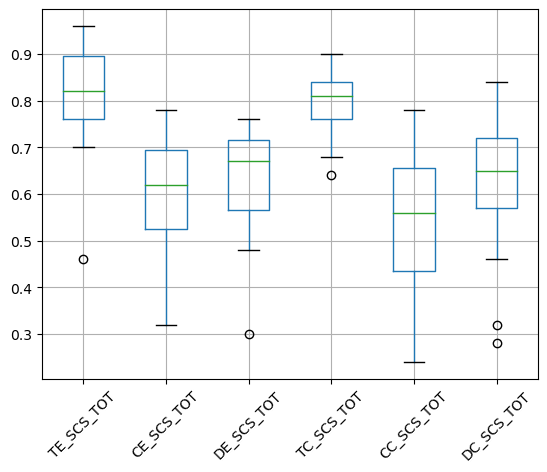

In [20]:
df_SCS.boxplot(column=["TE_SCS_TOT", "CE_SCS_TOT", "DE_SCS_TOT", "TC_SCS_TOT", "CC_SCS_TOT", "DC_SCS_TOT"], rot=45)

In [21]:
df_SCS_meltd = pd.melt(df_SCS.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_SCS_meltd.head()

,index,variable,value
0,0,TE_SCS_TOT,0.82
54,0,TC_SCS_TOT,0.90
36,0,DE_SCS_TOT,0.56
90,0,DC_SCS_TOT,0.56
18,0,CE_SCS_TOT,0.62


In [22]:
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df_SCS_meltd.variable = oe.fit_transform(df_SCS_meltd.variable.values.reshape(-1, 1))

res = kruskal(df_SCS_meltd.value, df_SCS_meltd.variable)

res

KruskalResult(statistic=71.93623223742951, pvalue=2.2226513444247946e-17)

In [23]:
oe.categories_

[array(['CC_SCS_TOT', 'CE_SCS_TOT', 'DC_SCS_TOT', 'DE_SCS_TOT',
        'TC_SCS_TOT', 'TE_SCS_TOT'], dtype=object)]

In [24]:
df_SCS_meltd2 = pd.melt(df_SCS.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_SCS_meltd2["variable1"] = df_SCS_meltd2.variable.apply(lambda x: x[1])
df_SCS_meltd2["variable2"] = df_SCS_meltd2.variable.apply(lambda x: x[0])

df_SCS_meltd2.drop(columns="variable", inplace=True)

df_SCS_meltd2.sort_values(by=["index", "variable1"]).head(5)

,index,value,variable1,variable2
54,0,0.90,C,T
90,0,0.56,C,D
72,0,0.48,C,C
0,0,0.82,E,T
36,0,0.56,E,D


In [25]:
from statsmodels.stats.anova import AnovaRM

df_SCS_meltd2.variable1 = OrdinalEncoder().fit_transform(df_SCS_meltd2.variable1.values.reshape(-1, 1))
df_SCS_meltd2.variable2 = OrdinalEncoder().fit_transform(df_SCS_meltd2.variable2.values.reshape(-1, 1))

AnovaRM(data=df_SCS_meltd2, depvar='value', subject='index', within=['variable1', "variable2"]).fit().summary()

,F Value,Num DF,Den DF,Pr > F
variable1,5.4012,1.0000,17.0000,0.0328
variable2,38.4438,2.0000,34.0000,0.0000
variable1:variable2,1.4056,2.0000,34.0000,0.2591


In [26]:
ss_total = np.var(df_SCS_meltd2.value, ddof=1)
ss_total

0.024766043613707153

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_SCS_meltd2 = pd.melt(df_SCS.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_SCS_meltd2["variable1"] = df_SCS_meltd2.variable.apply(lambda x: x[1])
df_SCS_meltd2["variable2"] = df_SCS_meltd2.variable.apply(lambda x: x[0])

tukey = pairwise_tukeyhsd(endog=df_SCS_meltd2['value'],
                          groups=df_SCS_meltd2['variable1'],
                          alpha=0.05)

#display results
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,E,0.0256,0.4013,-0.0346,0.0857,False


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_SCS_meltd2 = pd.melt(df_SCS.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_SCS_meltd2["variable1"] = df_SCS_meltd2.variable.apply(lambda x: x[1])
df_SCS_meltd2["variable2"] = df_SCS_meltd2.variable.apply(lambda x: x[0])

tukey = pairwise_tukeyhsd(endog=df_SCS_meltd2['value'],
                          groups=df_SCS_meltd2['variable2'],
                          alpha=0.05)

#display results
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,D,0.0544,0.1529,-0.0148,0.1237,False
C,T,0.2306,0.0,0.1613,0.2998,True
D,T,0.1761,0.0,0.1068,0.2454,True


c'è una differenza sign tra CT, DT

In [29]:
import pingouin as pg

pg.pairwise_ttests(data=df_SCS_meltd2, dv="value", between=["variable1", "variable2"], padjust="bonf")

/home/cri98li/anaconda3/lib/python3.9/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/cri98li/anaconda3/lib/python3.9/site-packages/pingouin/pairwise.py:583: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "Parametric"] = parametric


,Contrast,variable1,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,variable1,-,C,E,False,True,-0.842655,106.0,two-sided,4.013189e-01,NaN,NaN,0.28,-0.161019
1,variable2,-,C,D,False,True,-1.708033,70.0,two-sided,9.206176e-02,2.761853e-01,bonf,0.841,-0.398258
2,variable2,-,C,T,False,True,-8.313169,70.0,two-sided,4.840153e-12,1.452046e-11,bonf,1.24e+09,-1.938364
3,variable2,-,D,T,False,True,-6.382485,70.0,two-sided,1.634850e-08,4.904549e-08,bonf,5.99e+05,-1.488190
4,variable1 * variable2,C,C,D,False,True,-1.617548,34.0,two-sided,1.150015e-01,6.900089e-01,bonf,0.879,-0.527201
5,variable1 * variable2,C,C,T,False,True,-6.639630,34.0,two-sided,1.287634e-07,7.725802e-07,bonf,7.88e+04,-2.164028
6,variable1 * variable2,C,D,T,False,True,-4.341870,34.0,two-sided,1.203209e-04,7.219256e-04,bonf,182.86,-1.415128
7,variable1 * variable2,E,C,D,False,True,-0.724825,34.0,two-sided,4.735182e-01,1.000000e+00,bonf,0.395,-0.236239
8,variable1 * variable2,E,C,T,False,True,-5.185787,34.0,two-sided,9.860229e-06,5.916137e-05,bonf,1602.436,-1.690182
9,variable1 * variable2,E,D,T,False,True,-4.565752,34.0,two-sided,6.234712e-05,3.740827e-04,bonf,321.214,-1.488097


In [30]:
df_SCS

,TE_SCS_TOT,CE_SCS_TOT,DE_SCS_TOT,TC_SCS_TOT,CC_SCS_TOT,DC_SCS_TOT
0,0.82,0.62,0.56,0.90,0.48,0.56
1,0.46,0.32,0.30,0.64,0.24,0.32
2,0.80,0.42,0.64,0.68,0.38,0.62
3,0.90,0.62,0.68,0.84,0.42,0.84
4,0.74,0.56,0.66,0.72,0.64,0.66
5,0.78,0.78,0.48,0.84,0.58,0.28
6,0.84,0.66,0.68,0.90,0.58,0.64
7,0.70,0.76,0.76,0.76,0.72,0.76
8,0.86,0.52,0.54,0.70,0.50,0.52
9,0.82,0.42,0.48,0.82,0.40,0.64


In [31]:
import numpy as np
from scipy import stats
for col in df_SCS.columns:
    print(col)
    print(stats.shapiro(df_SCS[col]))
    print()

TE_SCS_TOT
ShapiroResult(statistic=0.8778390884399414, pvalue=0.02401277795433998)

CE_SCS_TOT
ShapiroResult(statistic=0.9533416628837585, pvalue=0.4798133373260498)

DE_SCS_TOT
ShapiroResult(statistic=0.8800193071365356, pvalue=0.02612329088151455)

TC_SCS_TOT
ShapiroResult(statistic=0.9568228721618652, pvalue=0.5416467189788818)

CC_SCS_TOT
ShapiroResult(statistic=0.9766477942466736, pvalue=0.9090308547019958)

DC_SCS_TOT
ShapiroResult(statistic=0.91634202003479, pvalue=0.1113593801856041)



In [32]:
from scipy.stats import bartlett

data = [
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "E") & (df_SCS_meltd2.variable2 == "T")].value,
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "E") & (df_SCS_meltd2.variable2 == "C")].value,
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "E") & (df_SCS_meltd2.variable2 == "D")].value,
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "C") & (df_SCS_meltd2.variable2 == "T")].value,
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "C") & (df_SCS_meltd2.variable2 == "C")].value,
    df_SCS_meltd2[(df_SCS_meltd2.variable1 == "C") & (df_SCS_meltd2.variable2 == "D")].value,
]

bartlett(data[0], data[1], data[2], data[3], data[4], data[5])

BartlettResult(statistic=8.472149031311783, pvalue=0.13206290170923848)

In [33]:
from statsmodels.stats.power import FTestAnovaPower

#FTestAnovaPower.power(effect_size=)

## Chi-2 
Corretto=1

In [34]:
df_easy = df[[x for x in cluster_columns if "Easy" in x]].copy(deep=True)
df_compl = df[[x for x in cluster_columns if "Easy" not in x]].copy(deep=True)

df_easy = df_easy.applymap(lambda x: 1 if x else 0)
df_compl = df_compl.applymap(lambda x: 1 if x else 0)

df_chi2 = pd.DataFrame([df_easy.sum().tolist(), df_compl.sum().tolist()], columns=[[x.split("_")[0] for x in cluster_columns[:3]]])
df_chi2["diff"] = ["Easy", "Complex"]

df_chi2 = pd.concat([df_chi2, pd.DataFrame(df_chi2.sum(axis=0)).T]).reset_index().drop(columns="index")
df_chi2["sum"] = df_chi2[df_chi2.columns[:3]].sum(axis=1)

expected = pd.DataFrame(np.outer(df_chi2["sum"][:2], df_chi2.values[2, :3]) /50, columns=df_chi2.columns[:3])

/tmp/ipykernel_35891/2507291189.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_chi2 = pd.concat([df_chi2, pd.DataFrame(df_chi2.sum(axis=0)).T]).reset_index().drop(columns="index")


In [35]:
chi_2_stat = (((df_chi2.values[:2, :3]-expected)**2)/expected).sum().sum()

chi_2_stat

3.896103896103896

In [36]:
from scipy.stats import chi2, chi2_contingency

critical_value = chi2.ppf(q=.95, df=2)

critical_value

5.991464547107979

In [37]:
p_val = 1-chi2.cdf(x=chi_2_stat, df=2)

p_val

0.1425514990025999

In [38]:
chi2_contingency(observed=df_chi2.values[:2, :3])

Chi2ContingencyResult(statistic=3.896103896103896, pvalue=0.14255149900259986, dof=2, expected_freq=array([[19.2,  4.2,  6.6],
       [12.8,  2.8,  4.4]]))

Sbagliato=1

In [39]:
df_easy = df[[x for x in cluster_columns if "Easy" in x]].copy(deep=True)
df_compl = df[[x for x in cluster_columns if "Easy" not in x]].copy(deep=True)

df_easy = df_easy.applymap(lambda x: 0 if x else 1)
df_compl = df_compl.applymap(lambda x: 0 if x else 1)

df_chi2 = pd.DataFrame([df_easy.sum().tolist(), df_compl.sum().tolist()], columns=[[x.split("_")[0] for x in cluster_columns[:3]]])
df_chi2["diff"] = ["Easy", "Complex"]

df_chi2 = pd.concat([df_chi2, pd.DataFrame(df_chi2.sum(axis=0)).T]).reset_index().drop(columns="index")
df_chi2["sum"] = df_chi2[df_chi2.columns[:3]].sum(axis=1)

expected = pd.DataFrame(np.outer(df_chi2["sum"][:2], df_chi2.values[2, :3]) /50, columns=df_chi2.columns[:3])

/tmp/ipykernel_35891/3468119711.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_chi2 = pd.concat([df_chi2, pd.DataFrame(df_chi2.sum(axis=0)).T]).reset_index().drop(columns="index")


In [40]:
chi_2_stat = (((df_chi2.values[:2, :3]-expected)**2)/expected).sum().sum()

chi_2_stat

1.7652941176470585

In [41]:
from scipy.stats import chi2, chi2_contingency

critical_value = chi2.ppf(q=.95, df=2)

critical_value

5.991464547107979

In [42]:
p_val = 1-chi2.cdf(x=chi_2_stat, df=2)

p_val

0.41368640880942587

In [43]:
chi2_contingency(observed=df_chi2.values[:2, :3])

Chi2ContingencyResult(statistic=0.5629411764705883, pvalue=0.7546731116168583, dof=2, expected_freq=array([[ 1.65517241, 12.        , 10.34482759],
       [ 2.34482759, 17.        , 14.65517241]]))

In [44]:
df[[x for x in df.columns if "time_Page Submit" in x]].reset_index().drop(columns="index").to_csv("human_ParTree_time.csv")

In [45]:
df_times = df[[x for x in df.columns if "time_Page Submit" in x]].agg([np.mean, np.std]).T

df_times.set_index(df_bar.T.index, inplace=True)

df_times

,mean,std
Tree_Easy_Cluster,112.771944,211.702921
Clu_Easy_Cluster,110.382333,91.960743
Dend_Easy_Cluster,133.787444,88.936697
Tree_Complex_Cluster,64.550944,46.831257
Clu_Complex_Cluster,148.842278,144.270668
Dend_Complex_Cluster,114.660556,77.686091


In [46]:
pd.concat(
    [(df_bar.rename(columns=rename_ric).T.rename(columns={True: "Correct", False: "Wrong"})/len(df)),
    df_times.T.rename(columns=rename_ric).T],
    axis=1
).to_csv("human_ParTree_performance.csv")

NameError: name 'rename_ric' is not defined

In [ ]:
df_bar = df[cluster_columns].apply(pd.value_counts)

In [ ]:
(df_bar.rename(columns=rename_ric).T.rename(columns={True: "Correct", False: "Wrong"})/len(df)).to_csv("human_ParTree_performance.csv")

In [ ]:
rename_ric = {
    'Tree_Easy_Cluster': "Tree E",
    'Clu_Easy_Cluster': "Parallel Coord E",
    'Dend_Easy_Cluster': "Dendo E",
    'Tree_Complex_Cluster': "Tree C",
    'Clu_Complex_Cluster': "Parallel Coord C",
    'Dend_Complex_Cluster': "Dendo C"
}

(df_bar.rename(columns=rename_ric).T.rename(columns={True: "Correct", False: "Wrong"})/len(df)).plot.bar()

# NASA

In [53]:
NASA = []
tmp = ["T", "C", "D"]

for a in ['MentalDemand', 'TemporalDemand', 'Performance', 'Effort', 'Frustration']:
    for b in ["TE", "CE", "DE", "TC", "CC", "DC"]:
        NASA.append(b+"_"+a)
        
for col in NASA:
    df[col] = df[col].apply(lambda x: 10 if x == "Very High" else x)
    df[col] = df[col].apply(lambda x: 1 if x == "Very Low" else x)
    
    df[col] = df[col].apply(lambda x: 10 if x == "Failure" else x)
    df[col] = df[col].apply(lambda x: 1 if x == "Perfect" else x)

NASA = sorted(NASA, key=lambda x: -ord(x[1])*10+tmp.index(x[0]))
df[NASA]

,TE_MentalDemand,TE_TemporalDemand,TE_Performance,TE_Effort,TE_Frustration,CE_MentalDemand,CE_TemporalDemand,CE_Performance,CE_Effort,CE_Frustration,...,CC_MentalDemand,CC_TemporalDemand,CC_Performance,CC_Effort,CC_Frustration,DC_MentalDemand,DC_TemporalDemand,DC_Performance,DC_Effort,DC_Frustration
1,2,5,1,2,3,7,6,6,5,8,...,8,8,8,9,10,7,6,7,6,8
5,6,1,9,7,3,9,3,10,7,10,...,7,3,10,7,10,9,3,10,9,10
8,3,1,1,2,1,10,5,10,8,8,...,8,5,10,8,10,7,5,7,7,8
9,2,2,2,1,1,7,6,5,6,7,...,8,6,7,6,8,3,2,5,4,6
10,6,5,2,3,2,5,4,10,5,4,...,5,7,9,4,10,5,9,10,4,10
11,2,2,1,1,1,3,4,2,3,1,...,3,5,6,3,10,6,6,10,6,10
12,2,1,1,2,1,7,2,8,6,7,...,8,1,9,7,10,8,1,6,6,7
15,6,5,5,7,2,7,6,5,7,8,...,8,6,4,8,2,1,7,3,8,3
16,1,1,1,2,1,7,3,6,6,7,...,8,2,6,7,8,8,3,5,7,8
17,3,2,1,2,1,9,9,8,8,7,...,10,10,10,9,10,7,6,7,6,8


In [54]:
col_names = ["TE_NASA_TOT", "CE_NASA_TOT", "DE_NASA_TOT", "TC_NASA_TOT", "CC_NASA_TOT", "DC_NASA_TOT"]
col_values = [[0, 0, 0, 0, 0, 0] for _ in range(len(df))]

for t in NASA:
    for i, el in enumerate(df[t].values):
        el = int(el)
        if t[:2] == "TE":
            col_values[i][0] += el
        if t[:2] == "CE":
            col_values[i][1] += el
        if t[:2] == "DE":
            col_values[i][2] += el

        if t[:2] == "TC":
            col_values[i][3] += el
        if t[:2] == "CC":
            col_values[i][4] += el
        if t[:2] == "DC":
            col_values[i][5] += el

In [55]:
df_NASA = pd.DataFrame(col_values, columns=col_names)*2

df_NASA

,TE_NASA_TOT,CE_NASA_TOT,DE_NASA_TOT,TC_NASA_TOT,CC_NASA_TOT,DC_NASA_TOT
0,26,64,68,14,86,68
1,52,78,72,46,74,82
2,16,82,52,40,82,68
3,16,62,54,24,70,40
4,36,56,62,36,70,76
5,14,26,80,14,54,76
6,14,60,46,22,70,56
7,50,66,72,90,56,44
8,12,58,52,38,62,62
9,18,82,78,22,98,68


<Axes: >

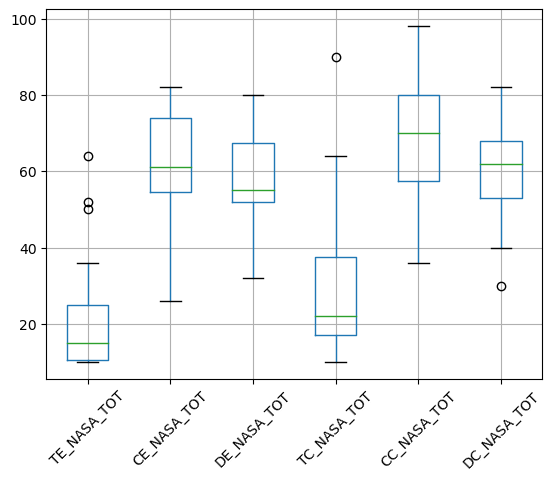

In [56]:
df_NASA.boxplot(column=df_NASA.columns.tolist(), rot=45)

In [57]:
df_NASA_meltd = pd.melt(df_NASA.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_NASA_meltd.head()

,index,variable,value
0,0,TE_NASA_TOT,26
54,0,TC_NASA_TOT,14
36,0,DE_NASA_TOT,68
90,0,DC_NASA_TOT,68
18,0,CE_NASA_TOT,64


In [ ]:
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df_NASA_meltd.variable = oe.fit_transform(df_NASA_meltd.variable.values.reshape(-1, 1))

res = kruskal(df_NASA_meltd.value, df_NASA_meltd.variable)

res

In [ ]:
df_NASA_meltd2 = pd.melt(df_NASA.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_NASA_meltd2["variable1"] = df_NASA_meltd2.variable.apply(lambda x: x[1])
df_NASA_meltd2["variable2"] = df_NASA_meltd2.variable.apply(lambda x: x[0])

df_NASA_meltd2.drop(columns="variable", inplace=True)

df_NASA_meltd2.sort_values(by=["index", "variable1"]).head(5)

In [ ]:
from statsmodels.stats.anova import AnovaRM

df_NASA_meltd2.variable1 = OrdinalEncoder().fit_transform(df_NASA_meltd2.variable1.values.reshape(-1, 1))
df_NASA_meltd2.variable2 = OrdinalEncoder().fit_transform(df_NASA_meltd2.variable2.values.reshape(-1, 1))

AnovaRM(data=df_NASA_meltd2, depvar='value', subject='index', within=['variable1', "variable2"]).fit().summary()

In [ ]:
ss_total = np.var(df_NASA_meltd2.value, ddof=1)
ss_total

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_NASA_meltd2 = pd.melt(df_NASA.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_NASA_meltd2["variable1"] = df_NASA_meltd2.variable.apply(lambda x: x[1])
df_NASA_meltd2["variable2"] = df_NASA_meltd2.variable.apply(lambda x: x[0])

tukey = pairwise_tukeyhsd(endog=df_NASA_meltd2['value'],
                          groups=df_NASA_meltd2['variable1'],
                          alpha=0.05)

#display results
tukey.summary()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_NASA_meltd2 = pd.melt(df_NASA.reset_index(), id_vars=['index'], value_vars=col_names).sort_values(by=["index"])

df_NASA_meltd2["variable1"] = df_NASA_meltd2.variable.apply(lambda x: x[1])
df_NASA_meltd2["variable2"] = df_NASA_meltd2.variable.apply(lambda x: x[0])

tukey = pairwise_tukeyhsd(endog=df_NASA_meltd2['value'],
                          groups=df_NASA_meltd2['variable2'],
                          alpha=0.05)

#display results
tukey.summary()

In [ ]:
import pingouin as pg

pg.pairwise_ttests(data=df_NASA_meltd2, dv="value", between=["variable1", "variable2"], padjust="bonf")

In [ ]:
import numpy as np
from scipy import stats
for col in df_NASA.columns:
    print(col)
    print(stats.shapiro(df_NASA[col]))
    print()

In [ ]:
from scipy.stats import bartlett

data = [
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "E") & (df_NASA_meltd2.variable2 == "T")].value,
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "E") & (df_NASA_meltd2.variable2 == "C")].value,
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "E") & (df_NASA_meltd2.variable2 == "D")].value,
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "C") & (df_NASA_meltd2.variable2 == "T")].value,
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "C") & (df_NASA_meltd2.variable2 == "C")].value,
    df_NASA_meltd2[(df_NASA_meltd2.variable1 == "C") & (df_NASA_meltd2.variable2 == "D")].value,
]

bartlett(data[0], data[1], data[2], data[3], data[4], data[5])

# Bonferroni, correlation

In [ ]:
tmp = pd.concat([df_SCS, df_NASA, df[cluster_columns]], axis=1)

for col in cluster_columns:
    tmp[col] = tmp[col].apply(lambda x: 1 if x else 0)

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
ax = plt.gca()
corr_matrix = tmp.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix,#.rename(columns=NFC_tiks,index=NFC_tiks), 
            annot = False, 
            vmin=-1, 
            vmax=1, 
            center= 0, 
            cmap= 'coolwarm',
            mask=mask)
#plt.yticks(rotation=90,ha='right') 
plt.yticks(rotation=0,ha='right') 
plt.show()

In [ ]:
corr_matrix

In [ ]:
np.unique(df[confidence_columns].values.flatten())

In [ ]:
confidence_levels = ["Completely confident", "Fairly confident", "Somewhat confident", "Slightly confident", "Not confident at all"]

In [ ]:
difficulty_levels.index("Easy")

In [ ]:
df.drop_duplicates(subset=["IPAddress"], inplace=True)

In [ ]:
# duration outliers
# RecordedDate da vedere fuso

In [ ]:
df[["TimeInstr_First Click", "TimeInstr_Last Click", "TimeInstr_Page Submit", "TimeInstr_Click Count"]]

In [ ]:
for k, v in dizionario.items():
    if k not in cluster_columns + difficulty_columns + confidence_columns + SCS + education_columns + time+ pesi:
        print(f"{k}")

In [ ]:
np.unique(df.Gender, return_counts=True)

In [ ]:
df.groupby(by=["Gender"])["Age"].agg(["mean", "std", "min", "max"])

In [ ]:
df.Age.astype(int).describe()

In [ ]:
len(df)

In [ ]:
df.School_major = df.School_major.apply(lambda x: str.lower(x))

df.groupby("School_major")[["School_major"]].count()

In [ ]:
df

In [ ]:
df_performance = df[cluster_columns].copy(deep=True)

df_performance_meltd = pd.melt(df_performance.reset_index(), id_vars=['index'], value_vars=cluster_columns).sort_values(by=["index"])

df_performance_meltd["variable1"] = df_performance_meltd.variable.apply(lambda x: x.split("_")[1][0])
df_performance_meltd["variable2"] = df_performance_meltd.variable.apply(lambda x: x[0])

df_performance_meltd.drop(columns="variable", inplace=True)

df_performance_meltd.head()

In [ ]:
df_performance_meltd.variable2.unique()

In [ ]:
from statsmodels.stats.anova import AnovaRM

df_performance_meltd.variable1 = OrdinalEncoder().fit_transform(df_performance_meltd.variable1.values.reshape(-1, 1))
df_performance_meltd.variable2 = OrdinalEncoder().fit_transform(df_performance_meltd.variable2.values.reshape(-1, 1))

AnovaRM(data=df_performance_meltd, depvar='value', subject='index', within=['variable1', "variable2"]).fit().summary()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_performance_meltd = pd.melt(df_performance.reset_index(), id_vars=['index'], value_vars=cluster_columns).sort_values(by=["index"])

df_performance_meltd["variable1"] = df_performance_meltd.variable.apply(lambda x: x.split("_")[1][0])
df_performance_meltd["variable2"] = df_performance_meltd.variable.apply(lambda x: x[0])

df_performance_meltd.drop(columns="variable", inplace=True)

tukey = pairwise_tukeyhsd(endog=df_performance_meltd['value'],
                          groups=df_performance_meltd['variable2'],
                          alpha=0.05)

#display results
tukey.summary()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_performance_meltd = pd.melt(df_performance.reset_index(), id_vars=['index'], value_vars=cluster_columns).sort_values(by=["index"])

df_performance_meltd["variable1"] = df_performance_meltd.variable.apply(lambda x: x.split("_")[1][0])
df_performance_meltd["variable2"] = df_performance_meltd.variable.apply(lambda x: x[0])

df_performance_meltd.drop(columns="variable", inplace=True)

tukey = pairwise_tukeyhsd(endog=df_performance_meltd['value'],
                          groups=df_performance_meltd['variable1'],
                          alpha=0.05)

#display results
tukey.summary()

In [ ]:
df_SCS.columns

In [214]:
rename_ric = {
    'Tree_Easy_Cluster': "CPT",
    'Clu_Easy_Cluster': "kM",
    'Dend_Easy_Cluster': "AHC",
    'Tree_Complex_Cluster': "CPT",
    'Clu_Complex_Cluster': "kM",
    'Dend_Complex_Cluster': "AHC"
}

rename_ric_SCS = {
    'TE_SCS_TOT': "CPT",
    'CE_SCS_TOT': "kM",
    'DE_SCS_TOT': "AHC",
    'TC_SCS_TOT': "CPT",
    'CC_SCS_TOT': "kM",
    'DC_SCS_TOT': "AHC"
}

rename_ric_NASA = {
    'TE_NASA_TOT': "CPT",
    'CE_NASA_TOT': "kM",
    'DE_NASA_TOT': "AHC",
    'TC_NASA_TOT': "CPT",
    'CC_NASA_TOT': "kM",
    'DC_NASA_TOT': "AHC"
}



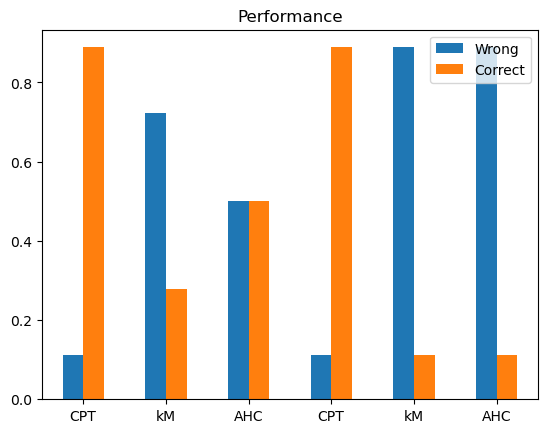

In [215]:
(df_bar.rename(columns=rename_ric).T.rename(columns={True: "Correct", False: "Wrong"})/len(df)).plot.bar(rot=0)
plt.title("Performance")
plt.gca().set_facecolor("white")


plt.savefig("human_performance.pdf", bbox_inches='tight')

[]

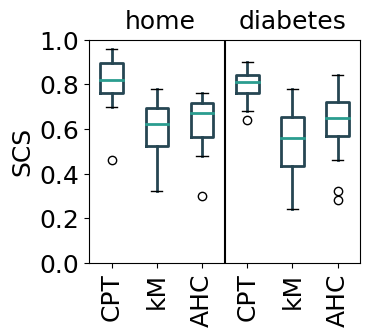

In [245]:
df_SCS.rename(columns=rename_ric_SCS).boxplot(fontsize=18, rot=90, 
                                              boxprops={"linewidth": 2, "color": "#264653"}, 
                                              whiskerprops={"linewidth": 2, "color": "#264653"},
                                              medianprops={"linewidth": 2, "color": "#2A9D8F"}, 
                                              figsize=(3.5, 2.9))
plt.gca().set_facecolor("white")
plt.gca().set_ylim(0, 1)
plt.gca().grid(False)

plt.text(1.3, 1.05, 'home', fontsize=18)
plt.text(3.8, 1.05, 'diabetes', fontsize=18)

plt.ylabel("SCS", rotation=90, fontsize=18)
plt.yticks(np.arange(0, 1.2, .2))

plt.axvline(x=3.5, c="black", linestyle="-")

plt.savefig("human_SCS.png", bbox_inches='tight', dpi=300)

plt.plot()

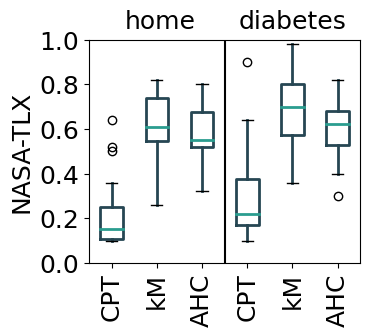

In [246]:
(df_NASA.rename(columns=rename_ric_NASA)/100).boxplot(fontsize=18, rot=90, 
                                              boxprops={"linewidth": 2, "color": "#264653"}, 
                                              whiskerprops={"linewidth": 2, "color": "#264653"},
                                              medianprops={"linewidth": 2, "color": "#2A9D8F"}, 
                                              figsize=(3.5, 2.9))

plt.ylabel("NASA-TLX", rotation=90, fontsize=18)
plt.gca().set_facecolor("white")
plt.gca().set_ylim(0, 1)
plt.gca().grid(False)

plt.text(1.3, 1.05, 'home', fontsize=18)
plt.text(3.8, 1.05, 'diabetes', fontsize=18)
plt.yticks(np.arange(0, 1.2, .2))


plt.axvline(x=3.5, c="black", linestyle="-")

plt.savefig("human_nasa.png", bbox_inches='tight', dpi=300)

<Axes: >

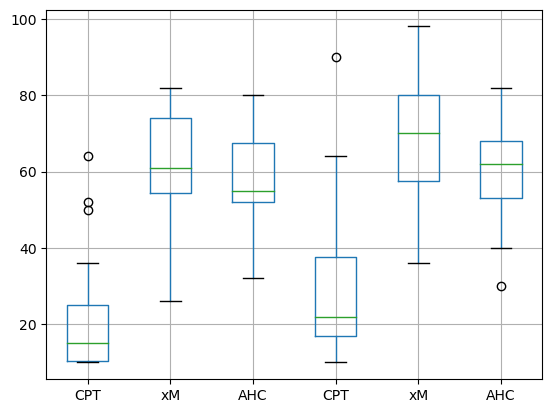

In [80]:
df_NASA.rename(columns=rename_ric_NASA).boxplot(rot=0)
